# Saeb 2021 - 3º/4º ano Ensino Médio:

Os microdados do Saeb podem ser encontrados aqui: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/saeb ou https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/saeb/resultados

**Análises:**
1) Distribuição de estudantes de 3º ano EM por declaração de cor/ raça e por proficiência em Língua Portuguesa e Matemática.

In [1]:
# Importando as bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Distribuição de estudantes de 3º ano EM por declaração de cor/ raça e por proficiência em Língua Portuguesa e Matemática:

## 3º ano do Ensino Fundamental:

Segundo o dicionário dos dados, a variável 'TX_RESP_Q04' (Qual é sua cor ou raça?) pode apresentar 8 valores distintos:
- *: Nulo;
- .: Resposta em branco;
- A: Branca;
- B: Preta;
- C: Parda;
- D: Amarela;
- E: Indígena;
- F: Não quero declarar.

Vamos utilizar dados do Saeb de 2021.

In [2]:
# Carregar os dados do Saeb 2021 em csv:
saeb2021_3EM = pd.read_csv(r"C:\Users\hugob\OneDrive\Desktop\microdados_saeb_2021_ensino_fundamental_e_medio\DADOS\TS_ALUNO_34EM.csv", sep=';')

In [3]:
saeb2021_3EM

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_SERIE,...,TX_RESP_Q22,TX_RESP_Q23a,TX_RESP_Q23b,TX_RESP_Q23c,TX_RESP_Q23d,TX_RESP_Q23e,TX_RESP_Q23f,TX_RESP_Q23g,TX_RESP_Q23h,TX_RESP_Q23i
0,2021,1,11,6316600,2,61342611,1,1,1252889,12,...,B,D,D,.,D,D,D,.,.,D
1,2021,1,11,6316600,2,61342611,1,1,1252889,12,...,.,.,.,.,.,.,.,.,.,.
2,2021,1,11,6316600,2,61342611,1,1,1252889,12,...,.,.,.,.,.,.,.,.,.,.
3,2021,1,11,6316600,2,61342611,1,1,1252889,12,...,A,D,D,D,A,B,C,C,C,A
4,2021,1,11,6316600,2,61342611,1,1,1252889,12,...,.,*,D,D,.,D,B,D,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288742,2021,5,53,6322169,1,61397110,0,1,1228406,12,...,.,.,.,.,.,.,.,.,.,.
2288743,2021,5,53,6322169,1,61397110,0,1,1228406,12,...,.,.,.,.,.,.,.,.,.,.
2288744,2021,5,53,6322169,1,61397110,0,1,1228406,12,...,.,.,.,.,.,.,.,.,.,.
2288745,2021,5,53,6322169,1,61397110,0,1,1228406,12,...,.,.,.,.,.,.,.,.,.,.


In [4]:
# Contagem de participantes em cada categoria:
contagem = saeb2021_3EM['TX_RESP_Q04'].value_counts()

contagem

TX_RESP_Q04
.    944875
C    601560
A    446551
B    196781
F     48327
D     33474
E     15929
*      1250
Name: count, dtype: int64

As proficiências são calculadas de acordo com a escala Saeb. 
Uma considera a média como 0 e desvio padrão 1. A outra considera a média 250 e desvio padrão 50. Sendo assim, caso a média das categorias estejam abaixo de 0 ou de 250, isso significa que elas estão abaixo do que seria a média da escala Saeb.

Para mais informações sobre a escala de proficiência Saeb, acesse: https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/saeb/matrizes-e-escalas

In [5]:
# Calcula a média, agrupando por Raça/Cor:
LP_media = saeb2021_3EM.groupby('TX_RESP_Q04')['PROFICIENCIA_LP'].mean()
LP_saeb_media = saeb2021_3EM.groupby('TX_RESP_Q04')['PROFICIENCIA_LP_SAEB'].mean()
MT_media = saeb2021_3EM.groupby('TX_RESP_Q04')['PROFICIENCIA_MT'].mean()
MT_saeb_media = saeb2021_3EM.groupby('TX_RESP_Q04')['PROFICIENCIA_MT_SAEB'].mean()

In [6]:
# Concatenar as Series em um único DataFrame:
saeb2021_3EM_proficiencia = pd.concat([contagem, LP_media, LP_saeb_media, MT_media, MT_saeb_media], axis=1)

# Remover a coluna do índice:
saeb2021_3EM_proficiencia = saeb2021_3EM_proficiencia.reset_index()

In [7]:
# Renomear a coluna:
saeb2021_3EM_proficiencia.columns = ['COR ou RACA', 'Contagem', 'PROFICIENCIA_LP', 'PROFICIENCIA_LP_SAEB', 'PROFICIENCIA_MT', 'PROFICIENCIA_MT_SAEB']

# Substituir os valores de 'COR ou RACA':
# Dicionário de mapeamento de valores a serem substituídos:
substituicoes_cor_raca = {'*': 'Nulo',
                          '.': 'Resposta em branco',
                          'A': 'Branca',
                          'B': 'Preta',
                          'C': 'Parda',
                          'D': 'Amarela',
                          'E': 'Indígena',
                          'F': 'Não quero declarar'}

# Substituir os valores na coluna específica usando o dicionário:
saeb2021_3EM_proficiencia['COR ou RACA'] = saeb2021_3EM_proficiencia['COR ou RACA'].replace(substituicoes_cor_raca)

In [8]:
# Reduzir para 2 casas decimais:
saeb2021_3EM_proficiencia = saeb2021_3EM_proficiencia.round(2)

In [9]:
saeb2021_3EM_proficiencia

,COR ou RACA,Contagem,PROFICIENCIA_LP,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT,PROFICIENCIA_MT_SAEB
0,Resposta em branco,944875,0.23,262.78,0.09,254.89
1,Parda,601560,0.36,269.98,0.25,263.86
2,Branca,446551,0.65,285.74,0.53,279.61
3,Preta,196781,0.26,264.55,0.11,256.02
4,Não quero declarar,48327,0.11,256.28,0.06,253.48
5,Amarela,33474,0.32,267.44,0.21,261.62
6,Indígena,15929,0.01,250.80,-0.06,246.71
7,Nulo,1250,0.03,251.62,-0.05,247.43


#### Visualizações:

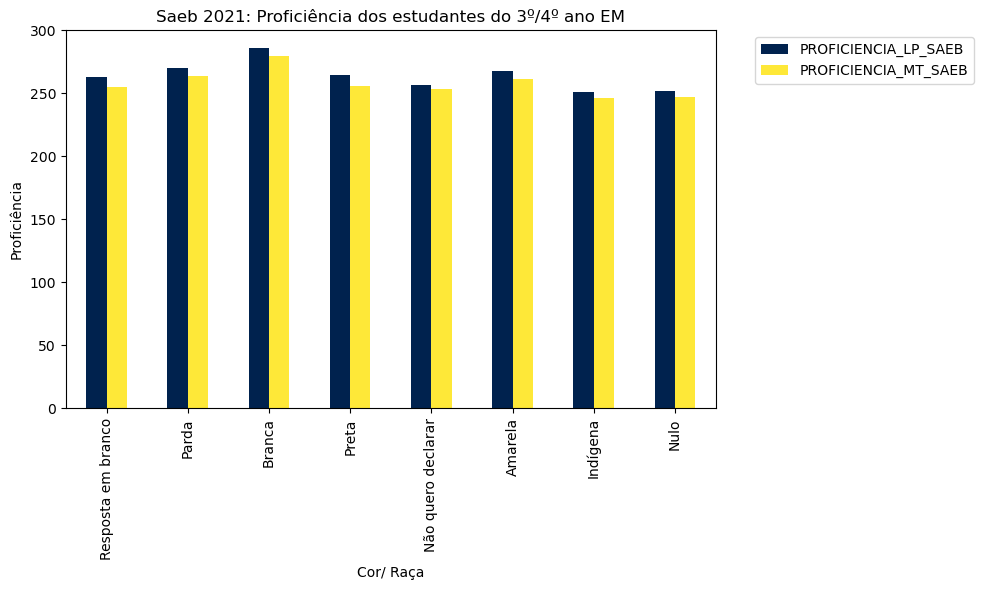

In [10]:
# Selecionar as variáveis específicas do DataFrame:
colunas_selecionadas = ['PROFICIENCIA_LP_SAEB', 'PROFICIENCIA_MT_SAEB']

# Criar o gráfico de barras verticais
saeb2021_3EM_proficiencia.set_index('COR ou RACA')[colunas_selecionadas].plot(kind='bar', colormap='cividis', stacked=False, figsize=(10, 6))

# Adicionar rótulos aos eixos
plt.xlabel('Cor/ Raça')
plt.ylabel('Proficiência')
plt.title('Saeb 2021: Proficiência dos estudantes do 3º/4º ano EM')

# Mover a legenda para fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Salvar imagem:
plt.savefig('Saeb 2021_Proficiencia 3EM.png')

# Exibir o gráfico
plt.show()

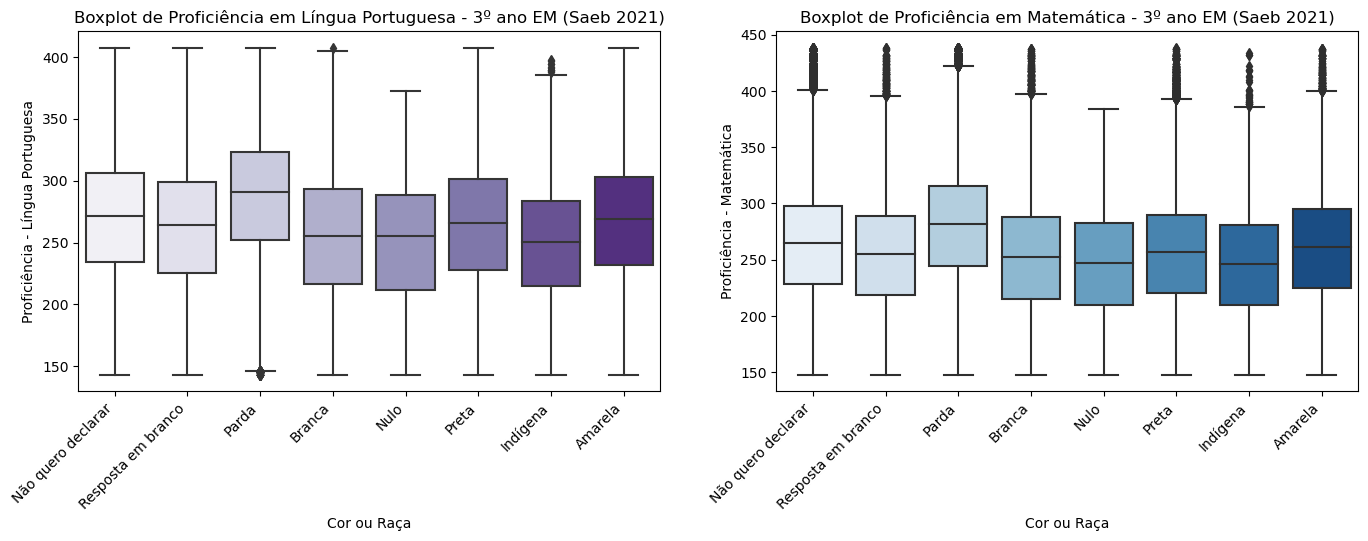

In [11]:
# BOXPLOT:
# Crie a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot para PROFICIENCIA_LP_SAEB
sns.boxplot(x='TX_RESP_Q04', y='PROFICIENCIA_LP_SAEB', data=saeb2021_3EM, ax=axes[0], palette="Purples")
axes[0].set_title('Boxplot de Proficiência em Língua Portuguesa - 3º ano EM (Saeb 2021)')
axes[0].set_xlabel('Cor ou Raça')
axes[0].set_ylabel('Proficiência - Língua Portuguesa')

# Modificar rótulos manualmente
axes[0].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Boxplot para PROFICIENCIA_MT_SAEB
sns.boxplot(x='TX_RESP_Q04', y='PROFICIENCIA_MT_SAEB', data=saeb2021_3EM, ax=axes[1], palette="Blues")
axes[1].set_title('Boxplot de Proficiência em Matemática - 3º ano EM (Saeb 2021)')
axes[1].set_xlabel('Cor ou Raça')
axes[1].set_ylabel('Proficiência - Matemática')

# Modificar rótulos manualmente
axes[1].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Ajuste as margens para garantir que toda a figura seja incluída
plt.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9)

# Salvar imagem:
plt.savefig('Saeb 2021_Boxplot proficiencia 3EM.png')

# Exibe o gráfico
plt.show()

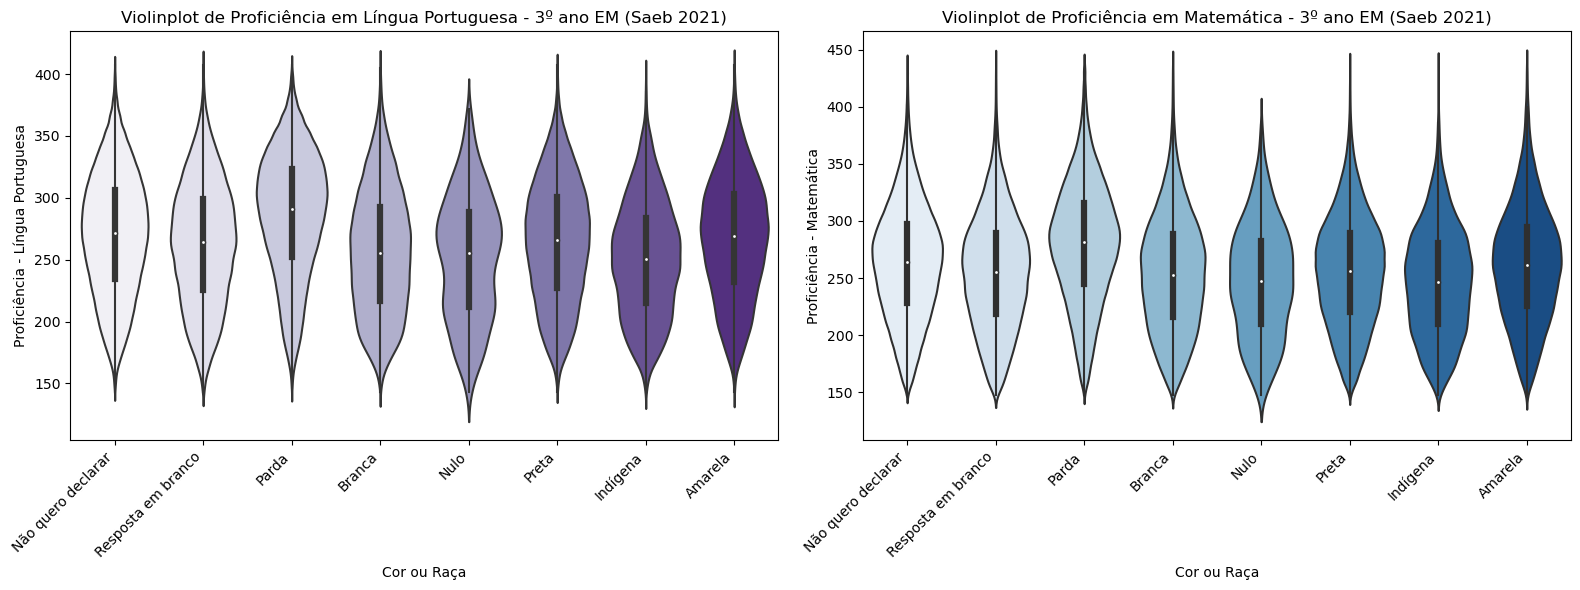

In [12]:
# GRÁFICO DE VIOLINO:
# Crie a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot para PROFICIENCIA_LP_SAEB
sns.violinplot(x='TX_RESP_Q04', y='PROFICIENCIA_LP_SAEB', data=saeb2021_3EM, ax=axes[0], palette="Purples")
axes[0].set_title('Violinplot de Proficiência em Língua Portuguesa - 3º ano EM (Saeb 2021)')
axes[0].set_xlabel('Cor ou Raça')
axes[0].set_ylabel('Proficiência - Língua Portuguesa')

# Modificar rótulos manualmente
axes[0].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Boxplot para PROFICIENCIA_MT_SAEB
sns.violinplot(x='TX_RESP_Q04', y='PROFICIENCIA_MT_SAEB', data=saeb2021_3EM, ax=axes[1], palette="Blues")
axes[1].set_title('Violinplot de Proficiência em Matemática - 3º ano EM (Saeb 2021)')
axes[1].set_xlabel('Cor ou Raça')
axes[1].set_ylabel('Proficiência - Matemática')

# Modificar rótulos manualmente
axes[1].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Salvar imagem:
plt.savefig('Saeb 2021_Violinplot_Proficiencia 3EM.png')

# Exibe o gráfico
plt.show()

## Para além da proficiência, vamos contabilizar alguns outros indicadores:

- TX_RESP_Q07: Qual é a maior escolaridade da sua mãe (ou mulher responsável por você)?
- TX_RESP_Q08: Qual é a maior escolaridade de seu pai (ou homem responsável por você)?
- TX_RESP_Q09c: Com que frequência seus pais ou responsáveis costumam: - Incentivar você a estudar.
- TX_RESP_Q21: Quando terminar o Ensino Médio você pretende:

### TX_RESP_Q07: Qual é a maior escolaridade da sua mãe (ou mulher responsável por você)?

In [13]:
saeb2021_3EM_escolaridade_mae = pd.crosstab(saeb2021_3EM['TX_RESP_Q04'], saeb2021_3EM['TX_RESP_Q07'])

saeb2021_3EM_escolaridade_mae

TX_RESP_Q07,*,.,A,B,C,D,E,F
TX_RESP_Q04,,,,,,,,
*,74,19,119,120,147,384,163,224
.,42,936813,823,876,1013,2597,869,1842
A,1691,2413,37162,44939,58234,166475,84519,51118
B,837,1584,22966,23997,26806,67498,22423,30670
C,2239,3563,72716,76828,82402,201971,73313,88528
D,146,195,4038,4128,4728,10933,4252,5054
E,59,128,2206,2115,2129,4855,1737,2700
F,192,404,4866,4482,4816,12970,4965,15632


In [14]:
# Modificando os nomes das colunas:
saeb2021_3EM_escolaridade_mae = saeb2021_3EM_escolaridade_mae.rename_axis(columns='Escolaridade da mãe').rename_axis(index='Cor ou Raça')

In [15]:
# Renomear as colunas:
saeb2021_3EM_escolaridade_mae.columns = ['Nulo',
                                         'Resposta em branco',
                                         'Não completou o 5º ano do Ensino Fundamental',
                                         'Ensino Fundamental, até o 5º ano',
                                         'Ensino Fundamental completo',
                                         'Ensino Médio completo',
                                         'Ensino Superior completo (faculdade ou graduação)',
                                         'Não sei']

In [16]:
# Renomear os índices:
saeb2021_3EM_escolaridade_mae = saeb2021_3EM_escolaridade_mae.rename({'*': 'Nulo',
                                                                      '.': 'Resposta em branco',
                                                                      'A': 'Branca',
                                                                      'B': 'Preta',
                                                                      'C': 'Parda',
                                                                      'D': 'Amarela',
                                                                      'E': 'Indígena',
                                                                      'F': 'Não quero declarar'})

In [17]:
saeb2021_3EM_escolaridade_mae

,Nulo,Resposta em branco,Não completou o 5º ano do Ensino Fundamental,"Ensino Fundamental, até o 5º ano",Ensino Fundamental completo,Ensino Médio completo,Ensino Superior completo (faculdade ou graduação),Não sei
Cor ou Raça,,,,,,,,
Nulo,74,19,119,120,147,384,163,224
Resposta em branco,42,936813,823,876,1013,2597,869,1842
Branca,1691,2413,37162,44939,58234,166475,84519,51118
Preta,837,1584,22966,23997,26806,67498,22423,30670
Parda,2239,3563,72716,76828,82402,201971,73313,88528
Amarela,146,195,4038,4128,4728,10933,4252,5054
Indígena,59,128,2206,2115,2129,4855,1737,2700
Não quero declarar,192,404,4866,4482,4816,12970,4965,15632


In [18]:
# Calcule as porcentagens em relação ao somatório das linhas:
saeb2021_3EM_escolaridade_mae_porcentagem = saeb2021_3EM_escolaridade_mae.div(saeb2021_3EM_escolaridade_mae.sum(axis=1), axis=0) * 100

# Adicione as novas colunas ao DataFrame original:
saeb2021_3EM_escolaridade_mae = pd.concat([saeb2021_3EM_escolaridade_mae, saeb2021_3EM_escolaridade_mae_porcentagem.add_suffix(' (%)')], axis=1)

In [19]:
saeb2021_3EM_escolaridade_mae = saeb2021_3EM_escolaridade_mae.round(2)

In [20]:
saeb2021_3EM_escolaridade_mae

,Nulo,Resposta em branco,Não completou o 5º ano do Ensino Fundamental,"Ensino Fundamental, até o 5º ano",Ensino Fundamental completo,Ensino Médio completo,Ensino Superior completo (faculdade ou graduação),Não sei,Nulo (%),Resposta em branco (%),Não completou o 5º ano do Ensino Fundamental (%),"Ensino Fundamental, até o 5º ano (%)",Ensino Fundamental completo (%),Ensino Médio completo (%),Ensino Superior completo (faculdade ou graduação) (%),Não sei (%)
Cor ou Raça,,,,,,,,,,,,,,,,
Nulo,74,19,119,120,147,384,163,224,5.92,1.52,9.52,9.60,11.76,30.72,13.04,17.92
Resposta em branco,42,936813,823,876,1013,2597,869,1842,0.00,99.15,0.09,0.09,0.11,0.27,0.09,0.19
Branca,1691,2413,37162,44939,58234,166475,84519,51118,0.38,0.54,8.32,10.06,13.04,37.28,18.93,11.45
Preta,837,1584,22966,23997,26806,67498,22423,30670,0.43,0.80,11.67,12.19,13.62,34.30,11.39,15.59
Parda,2239,3563,72716,76828,82402,201971,73313,88528,0.37,0.59,12.09,12.77,13.70,33.57,12.19,14.72
Amarela,146,195,4038,4128,4728,10933,4252,5054,0.44,0.58,12.06,12.33,14.12,32.66,12.70,15.10
Indígena,59,128,2206,2115,2129,4855,1737,2700,0.37,0.80,13.85,13.28,13.37,30.48,10.90,16.95
Não quero declarar,192,404,4866,4482,4816,12970,4965,15632,0.40,0.84,10.07,9.27,9.97,26.84,10.27,32.35


#### Visualizações:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

#Novo Dataframe só com as colunas de % de escolaridade:
# Selecione as colunas desejadas:
columns_to_plot = ['Nulo (%)',
                   'Resposta em branco (%)',
                   'Não completou o 5º ano do Ensino Fundamental (%)',
                   'Ensino Fundamental, até o 5º ano (%)',
                   'Ensino Fundamental completo (%)',
                   'Ensino Médio completo (%)',
                   'Ensino Superior completo (faculdade ou graduação) (%)',
                   'Não sei (%)']

# Crie um novo DataFrame apenas com as colunas desejadas
saeb2021_3EM_escolaridade_mae_porcentagem = saeb2021_3EM_escolaridade_mae[columns_to_plot]

In [22]:
saeb2021_3EM_escolaridade_mae_porcentagem = saeb2021_3EM_escolaridade_mae_porcentagem.round(2)

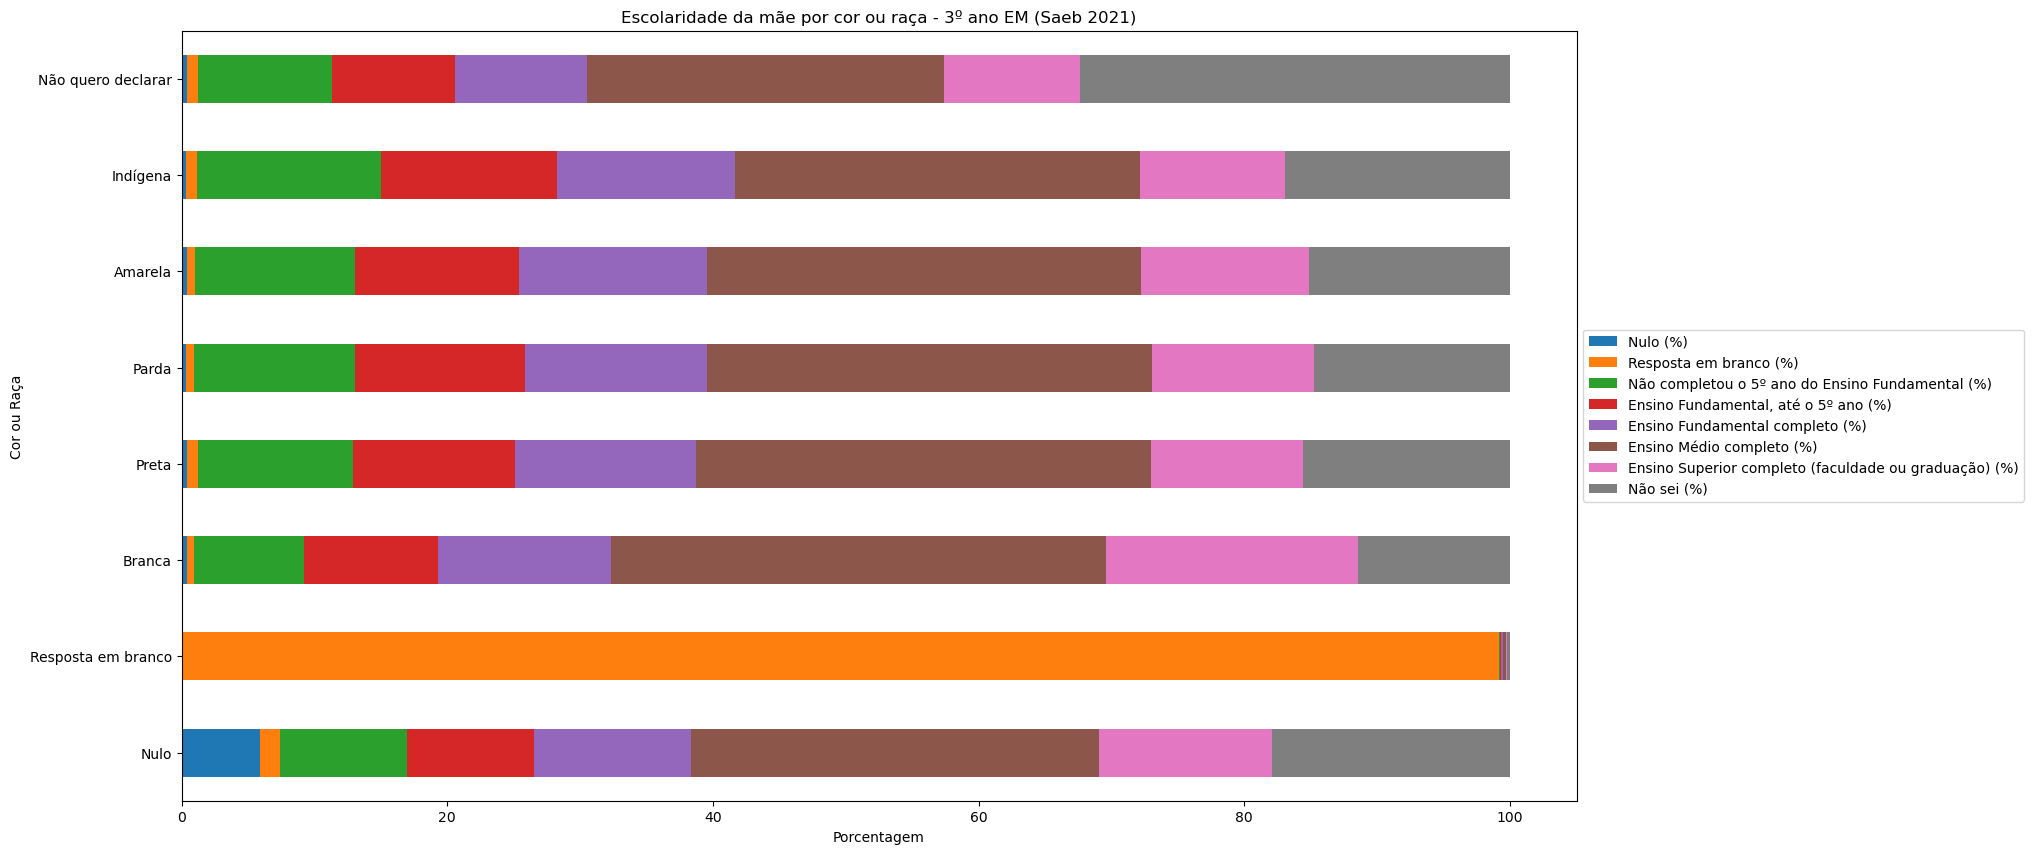

In [23]:
# Criar gráfico de barras empilhadas horizontais
ax = saeb2021_3EM_escolaridade_mae_porcentagem.plot(kind='barh', stacked=True, figsize=(18, 10))

# Configurar rótulos e título
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Cor ou Raça')
ax.set_title('Escolaridade da mãe por cor ou raça - 3º ano EM (Saeb 2021)')

# Adicionar a legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Salvar imagem:
plt.savefig('3EM_Escolaridade mae.png', bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [24]:
saeb2021_3EM_escolaridade_mae_porcentagem

,Nulo (%),Resposta em branco (%),Não completou o 5º ano do Ensino Fundamental (%),"Ensino Fundamental, até o 5º ano (%)",Ensino Fundamental completo (%),Ensino Médio completo (%),Ensino Superior completo (faculdade ou graduação) (%),Não sei (%)
Cor ou Raça,,,,,,,,
Nulo,5.92,1.52,9.52,9.60,11.76,30.72,13.04,17.92
Resposta em branco,0.00,99.15,0.09,0.09,0.11,0.27,0.09,0.19
Branca,0.38,0.54,8.32,10.06,13.04,37.28,18.93,11.45
Preta,0.43,0.80,11.67,12.19,13.62,34.30,11.39,15.59
Parda,0.37,0.59,12.09,12.77,13.70,33.57,12.19,14.72
Amarela,0.44,0.58,12.06,12.33,14.12,32.66,12.70,15.10
Indígena,0.37,0.80,13.85,13.28,13.37,30.48,10.90,16.95
Não quero declarar,0.40,0.84,10.07,9.27,9.97,26.84,10.27,32.35


### TX_RESP_Q08: Qual é a maior escolaridade de seu pai (ou homem responsável por você)?

In [25]:
saeb2021_3EM_escolaridade_pai = pd.crosstab(saeb2021_3EM['TX_RESP_Q04'], saeb2021_3EM['TX_RESP_Q08'])

saeb2021_3EM_escolaridade_pai

TX_RESP_Q08,*,.,A,B,C,D,E,F
TX_RESP_Q04,,,,,,,,
*,57,21,132,123,136,336,103,342
.,20,936800,1010,869,845,1847,546,2938
A,769,2585,46588,51093,55029,140656,53998,95833
B,331,1769,27530,24040,22778,49433,12000,58900
C,865,3989,90120,79371,70804,152135,40836,163440
D,58,232,4911,4331,3804,8226,2558,9354
E,41,163,2477,2101,1792,3716,1231,4408
F,82,489,5372,4286,3801,9017,2935,22345


In [26]:
# Renomear as colunas:
saeb2021_3EM_escolaridade_pai.columns = ['Nulo',
                                         'Resposta em branco',
                                         'Não completou o 5º ano do Ensino Fundamental',
                                         'Ensino Fundamental, até o 5º ano',
                                         'Ensino Fundamental completo',
                                         'Ensino Médio completo',
                                         'Ensino Superior completo (faculdade ou graduação)',
                                         'Não sei']

In [27]:
# Modificando os nomes das colunas:
saeb2021_3EM_escolaridade_pai = saeb2021_3EM_escolaridade_pai.rename_axis(index='Cor ou Raça')

In [28]:
# Renomear os índices:
saeb2021_3EM_escolaridade_pai = saeb2021_3EM_escolaridade_pai.rename({'*': 'Nulo',
                                                                      '.': 'Resposta em branco',
                                                                      'A': 'Branca',
                                                                      'B': 'Preta',
                                                                      'C': 'Parda',
                                                                      'D': 'Amarela',
                                                                      'E': 'Indígena',
                                                                      'F': 'Não quero declarar'})

In [29]:
# Calcule as porcentagens em relação ao somatório das linhas:
saeb2021_3EM_escolaridade_pai_porcentagem = saeb2021_3EM_escolaridade_pai.div(saeb2021_3EM_escolaridade_pai.sum(axis=1), axis=0) * 100

# Adicione as novas colunas ao DataFrame original:
saeb2021_3EM_escolaridade_pai = pd.concat([saeb2021_3EM_escolaridade_pai, saeb2021_3EM_escolaridade_pai_porcentagem.add_suffix(' (%)')], axis=1)

In [30]:
saeb2021_3EM_escolaridade_pai = saeb2021_3EM_escolaridade_pai.round(2)

#### Visualizações:

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

#Novo Dataframe só com as colunas de % de escolaridade:
# Selecione as colunas desejadas:
columns_to_plot = ['Nulo (%)',
                   'Resposta em branco (%)',
                   'Não completou o 5º ano do Ensino Fundamental (%)',
                   'Ensino Fundamental, até o 5º ano (%)',
                   'Ensino Fundamental completo (%)',
                   'Ensino Médio completo (%)',
                   'Ensino Superior completo (faculdade ou graduação) (%)',
                   'Não sei (%)']

# Crie um novo DataFrame apenas com as colunas desejadas
saeb2021_3EM_escolaridade_pai_porcentagem = saeb2021_3EM_escolaridade_pai[columns_to_plot]

In [32]:
saeb2021_3EM_escolaridade_pai_porcentagem = saeb2021_3EM_escolaridade_pai_porcentagem.round(2)

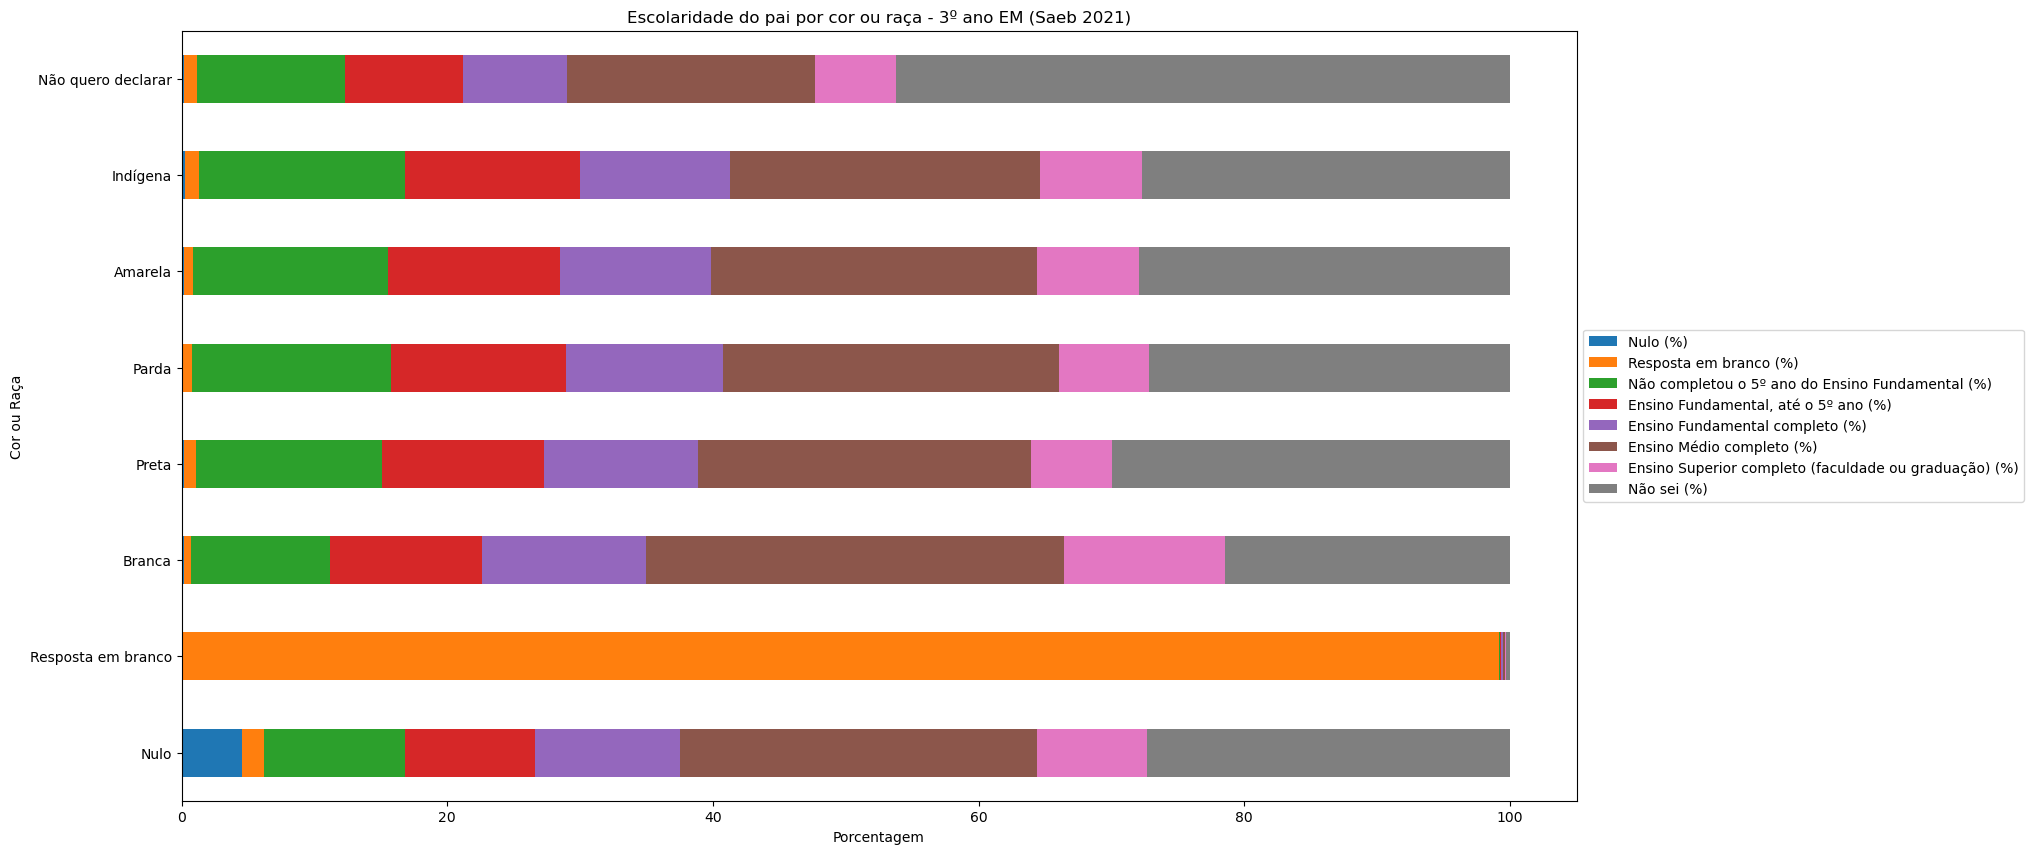

In [33]:
# Criar gráfico de barras empilhadas horizontais
ax = saeb2021_3EM_escolaridade_pai_porcentagem.plot(kind='barh', stacked=True, figsize=(18, 10))

# Configurar rótulos e título
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Cor ou Raça')
ax.set_title('Escolaridade do pai por cor ou raça - 3º ano EM (Saeb 2021)')

# Adicionar a legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Salvar imagem:
plt.savefig('3EM_Escolaridade pai.png', bbox_inches='tight')


# Exibir o gráfico
plt.show()

In [34]:
saeb2021_3EM_escolaridade_pai_porcentagem

,Nulo (%),Resposta em branco (%),Não completou o 5º ano do Ensino Fundamental (%),"Ensino Fundamental, até o 5º ano (%)",Ensino Fundamental completo (%),Ensino Médio completo (%),Ensino Superior completo (faculdade ou graduação) (%),Não sei (%)
Cor ou Raça,,,,,,,,
Nulo,4.56,1.68,10.56,9.84,10.88,26.88,8.24,27.36
Resposta em branco,0.00,99.15,0.11,0.09,0.09,0.20,0.06,0.31
Branca,0.17,0.58,10.43,11.44,12.32,31.50,12.09,21.46
Preta,0.17,0.90,13.99,12.22,11.58,25.12,6.10,29.93
Parda,0.14,0.66,14.98,13.19,11.77,25.29,6.79,27.17
Amarela,0.17,0.69,14.67,12.94,11.36,24.57,7.64,27.94
Indígena,0.26,1.02,15.55,13.19,11.25,23.33,7.73,27.67
Não quero declarar,0.17,1.01,11.12,8.87,7.87,18.66,6.07,46.24


### TX_RESP_Q09c: Com que frequência seus pais ou responsáveis costumam: - Incentivar você a estudar.

In [35]:
saeb2021_3EM_incentivo_estudo = pd.crosstab(saeb2021_3EM['TX_RESP_Q04'], saeb2021_3EM['TX_RESP_Q09c'])

saeb2021_3EM_incentivo_estudo

TX_RESP_Q09c,*,.,A,B,C
TX_RESP_Q04,,,,,
*,39,86,78,208,839
.,432,898742,1984,7413,36304
A,1958,11652,16138,69695,347108
B,1307,8147,7453,26989,152885
C,3442,19052,20333,85290,473443
D,196,1225,1470,5390,25193
E,158,959,735,2442,11635
F,345,2453,2636,8489,34404


In [36]:
# Modificando os nomes das colunas:
saeb2021_3EM_incentivo_estudo = saeb2021_3EM_incentivo_estudo.rename_axis(index='Cor ou Raça')

In [37]:
# Renomear as colunas:
saeb2021_3EM_incentivo_estudo.columns = ['Nulo',
                                         'Resposta em branco',
                                         'Nunca ou quase nunca',
                                         'De vez em quando',
                                         'Sempre ou quase sempre']

In [38]:
# Renomear os índices:
saeb2021_3EM_incentivo_estudo = saeb2021_3EM_incentivo_estudo.rename({'*': 'Nulo',
                                                                      '.': 'Resposta em branco',
                                                                      'A': 'Branca',
                                                                      'B': 'Preta',
                                                                      'C': 'Parda',
                                                                      'D': 'Amarela',
                                                                      'E': 'Indígena',
                                                                      'F': 'Não quero declarar'})

In [39]:
# Calcule as porcentagens em relação ao somatório das linhas:
saeb2021_3EM_incentivo_estudo_porcentagem = saeb2021_3EM_incentivo_estudo.div(saeb2021_3EM_incentivo_estudo.sum(axis=1), axis=0) * 100

# Adicione as novas colunas ao DataFrame original:
saeb2021_3EM_incentivo_estudo = pd.concat([saeb2021_3EM_incentivo_estudo, saeb2021_3EM_incentivo_estudo_porcentagem.add_suffix(' (%)')], axis=1)

In [40]:
saeb2021_3EM_incentivo_estudo = saeb2021_3EM_incentivo_estudo.round(2)

**Visualizações:**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

#Novo Dataframe só com as colunas de % de escolaridade:
# Selecione as colunas desejadas:
columns_to_plot = ['Nulo (%)',
                   'Resposta em branco (%)',
                   'Nunca ou quase nunca (%)',
                   'De vez em quando (%)',
                   'Sempre ou quase sempre (%)']

# Crie um novo DataFrame apenas com as colunas desejadas
saeb2021_3EM_incentivo_estudo_porcentagem = saeb2021_3EM_incentivo_estudo[columns_to_plot]

In [42]:
saeb2021_3EM_incentivo_estudo_porcentagem = saeb2021_3EM_incentivo_estudo_porcentagem.round(2)

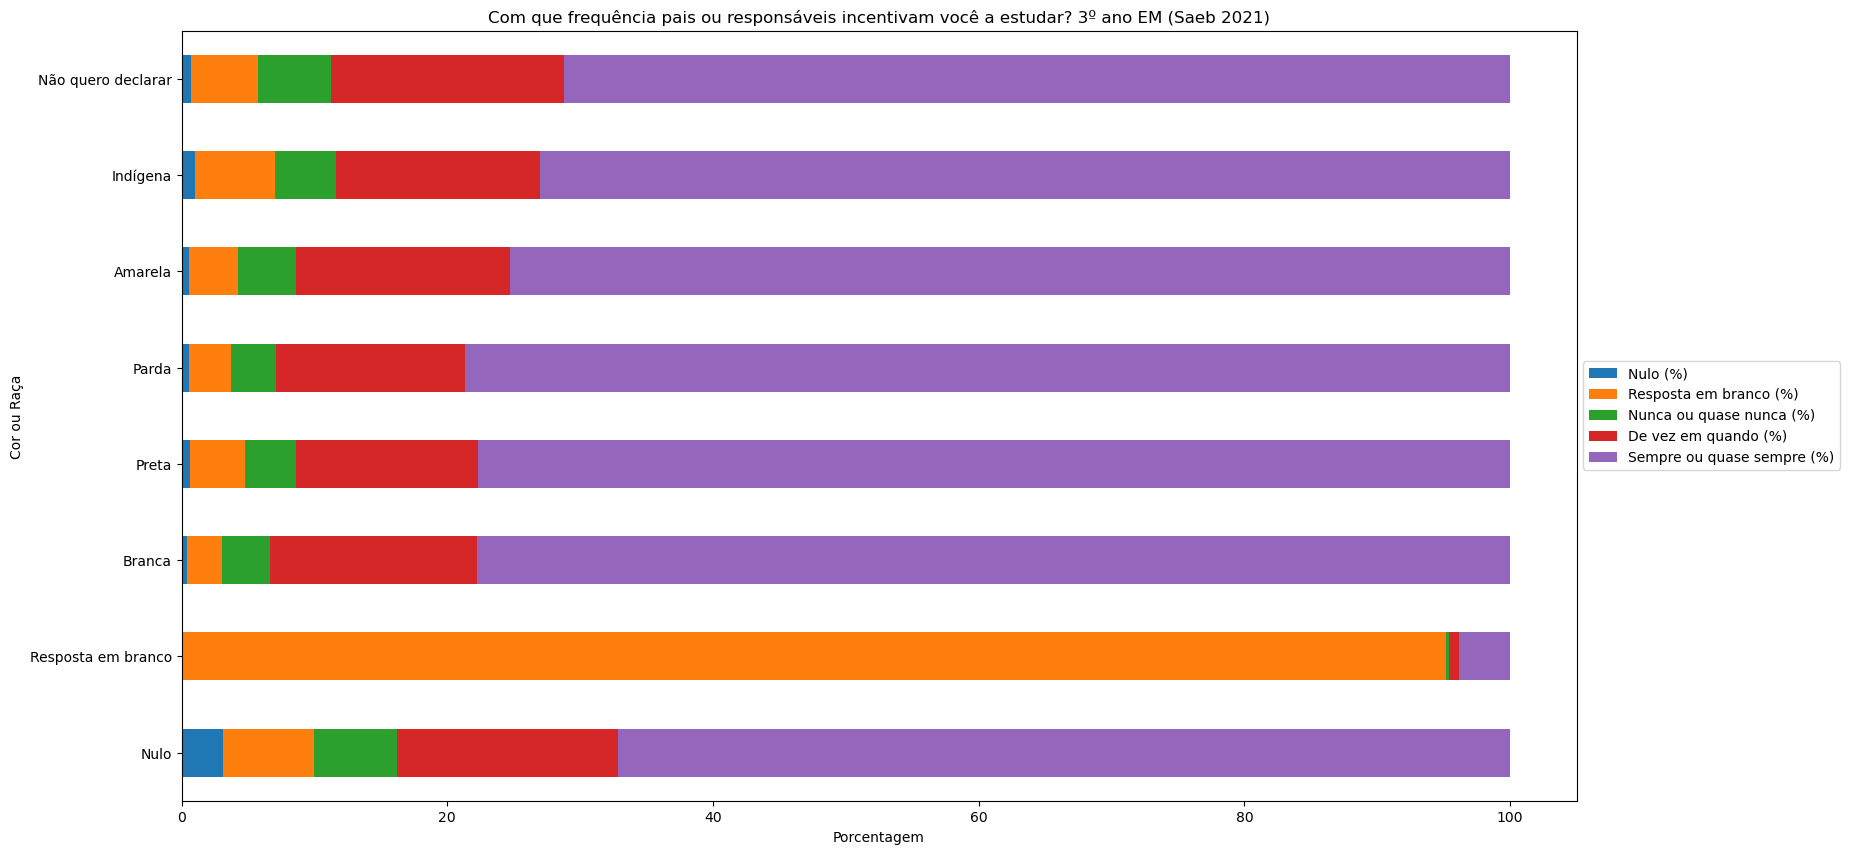

In [43]:
# Criar gráfico de barras empilhadas horizontais
ax = saeb2021_3EM_incentivo_estudo_porcentagem.plot(kind='barh', stacked=True, figsize=(18, 10))

# Configurar rótulos e título
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Cor ou Raça')
ax.set_title('Com que frequência pais ou responsáveis incentivam você a estudar? 3º ano EM (Saeb 2021)')

# Adicionar a legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Salvar imagem:
plt.savefig('3EM_Incentivo a estudar.png', bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [44]:
saeb2021_3EM_incentivo_estudo_porcentagem

,Nulo (%),Resposta em branco (%),Nunca ou quase nunca (%),De vez em quando (%),Sempre ou quase sempre (%)
Cor ou Raça,,,,,
Nulo,3.12,6.88,6.24,16.64,67.12
Resposta em branco,0.05,95.12,0.21,0.78,3.84
Branca,0.44,2.61,3.61,15.61,77.73
Preta,0.66,4.14,3.79,13.72,77.69
Parda,0.57,3.17,3.38,14.18,78.70
Amarela,0.59,3.66,4.39,16.10,75.26
Indígena,0.99,6.02,4.61,15.33,73.04
Não quero declarar,0.71,5.08,5.45,17.57,71.19


### TX_RESP_Q21: Quando terminar o Ensino Médio você pretende:

In [45]:
saeb2021_3EM_pos_Ensino_Medio = pd.crosstab(saeb2021_3EM['TX_RESP_Q04'], saeb2021_3EM['TX_RESP_Q21'])

saeb2021_3EM_pos_Ensino_Medio

TX_RESP_Q21,*,.,A,B,C,D
TX_RESP_Q04,,,,,,
*,36,65,42,154,776,177
.,102,898879,2122,5639,32541,5592
A,559,14817,27399,35944,327502,40330
B,327,8076,7118,23440,137438,20382
C,734,21516,26770,60779,425880,65881
D,52,1247,1493,3539,23193,3950
E,36,742,1135,1916,9979,2121
F,92,2107,1592,6972,26822,10742


In [46]:
# Modificando os nomes das colunas:
saeb2021_3EM_pos_Ensino_Medio = saeb2021_3EM_pos_Ensino_Medio.rename_axis(index='Cor ou Raça')

In [47]:
# Renomear as colunas:
saeb2021_3EM_pos_Ensino_Medio.columns = ['Nulo',
                                         'Resposta em branco',
                                         'Somente continuar estudando',
                                         'Somente trabalhar',
                                         'Continuar estudando e trabalhar',
                                         'Ainda não sei']

In [48]:
# Renomear os índices:
saeb2021_3EM_pos_Ensino_Medio = saeb2021_3EM_pos_Ensino_Medio.rename({'*': 'Nulo',
                                                                      '.': 'Resposta em branco',
                                                                      'A': 'Branca',
                                                                      'B': 'Preta',
                                                                      'C': 'Parda',
                                                                      'D': 'Amarela',
                                                                      'E': 'Indígena',
                                                                      'F': 'Não quero declarar'})

In [49]:
# Calcule as porcentagens em relação ao somatório das linhas:
saeb2021_3EM_pos_Ensino_Medio_porcentagem = saeb2021_3EM_pos_Ensino_Medio.div(saeb2021_3EM_pos_Ensino_Medio.sum(axis=1), axis=0) * 100

# Adicione as novas colunas ao DataFrame original:
saeb2021_3EM_pos_Ensino_Medio = pd.concat([saeb2021_3EM_pos_Ensino_Medio, saeb2021_3EM_pos_Ensino_Medio_porcentagem.add_suffix(' (%)')], axis=1)

In [50]:
saeb2021_3EM_pos_Ensino_Medio = saeb2021_3EM_pos_Ensino_Medio.round(2)

In [51]:
saeb2021_3EM_pos_Ensino_Medio

,Nulo,Resposta em branco,Somente continuar estudando,Somente trabalhar,Continuar estudando e trabalhar,Ainda não sei,Nulo (%),Resposta em branco (%),Somente continuar estudando (%),Somente trabalhar (%),Continuar estudando e trabalhar (%),Ainda não sei (%)
Cor ou Raça,,,,,,,,,,,,
Nulo,36,65,42,154,776,177,2.88,5.20,3.36,12.32,62.08,14.16
Resposta em branco,102,898879,2122,5639,32541,5592,0.01,95.13,0.22,0.60,3.44,0.59
Branca,559,14817,27399,35944,327502,40330,0.13,3.32,6.14,8.05,73.34,9.03
Preta,327,8076,7118,23440,137438,20382,0.17,4.10,3.62,11.91,69.84,10.36
Parda,734,21516,26770,60779,425880,65881,0.12,3.58,4.45,10.10,70.80,10.95
Amarela,52,1247,1493,3539,23193,3950,0.16,3.73,4.46,10.57,69.29,11.80
Indígena,36,742,1135,1916,9979,2121,0.23,4.66,7.13,12.03,62.65,13.32
Não quero declarar,92,2107,1592,6972,26822,10742,0.19,4.36,3.29,14.43,55.50,22.23


**Visualizações:**

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

#Novo Dataframe só com as colunas de % de escolaridade:
# Selecione as colunas desejadas:
columns_to_plot = ['Nulo (%)',
                   'Resposta em branco (%)',
                   'Somente continuar estudando (%)',
                   'Somente trabalhar (%)',
                   'Continuar estudando e trabalhar (%)',
                   'Ainda não sei (%)']

# Crie um novo DataFrame apenas com as colunas desejadas
saeb2021_3EM_pos_Ensino_Medio_porcentagem = saeb2021_3EM_pos_Ensino_Medio[columns_to_plot]

In [53]:
saeb2021_3EM_pos_Ensino_Medio_porcentagem = saeb2021_3EM_pos_Ensino_Medio_porcentagem.round(2)

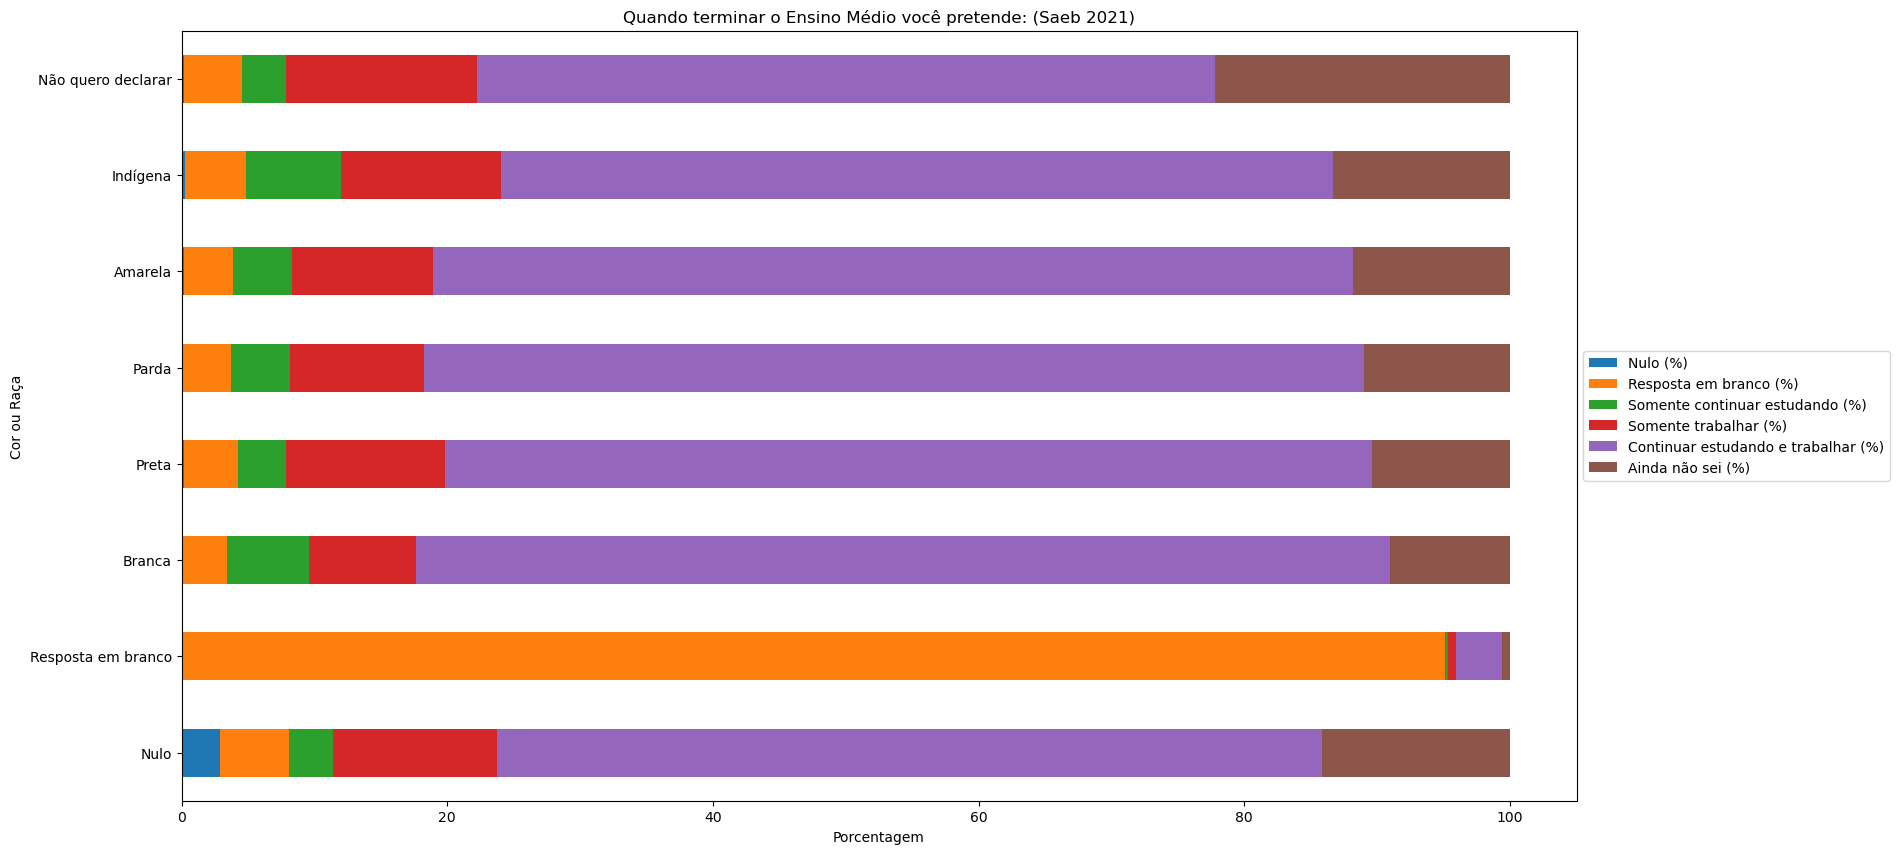

In [54]:
# Criar gráfico de barras empilhadas horizontais
ax = saeb2021_3EM_pos_Ensino_Medio_porcentagem.plot(kind='barh', stacked=True, figsize=(18, 10))

# Configurar rótulos e título
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Cor ou Raça')
ax.set_title('Quando terminar o Ensino Médio você pretende: (Saeb 2021)')

# Adicionar a legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Salvar imagem:
plt.savefig('3EM_Pos EM.png', bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [55]:
saeb2021_3EM_pos_Ensino_Medio_porcentagem

,Nulo (%),Resposta em branco (%),Somente continuar estudando (%),Somente trabalhar (%),Continuar estudando e trabalhar (%),Ainda não sei (%)
Cor ou Raça,,,,,,
Nulo,2.88,5.20,3.36,12.32,62.08,14.16
Resposta em branco,0.01,95.13,0.22,0.60,3.44,0.59
Branca,0.13,3.32,6.14,8.05,73.34,9.03
Preta,0.17,4.10,3.62,11.91,69.84,10.36
Parda,0.12,3.58,4.45,10.10,70.80,10.95
Amarela,0.16,3.73,4.46,10.57,69.29,11.80
Indígena,0.23,4.66,7.13,12.03,62.65,13.32
Não quero declarar,0.19,4.36,3.29,14.43,55.50,22.23


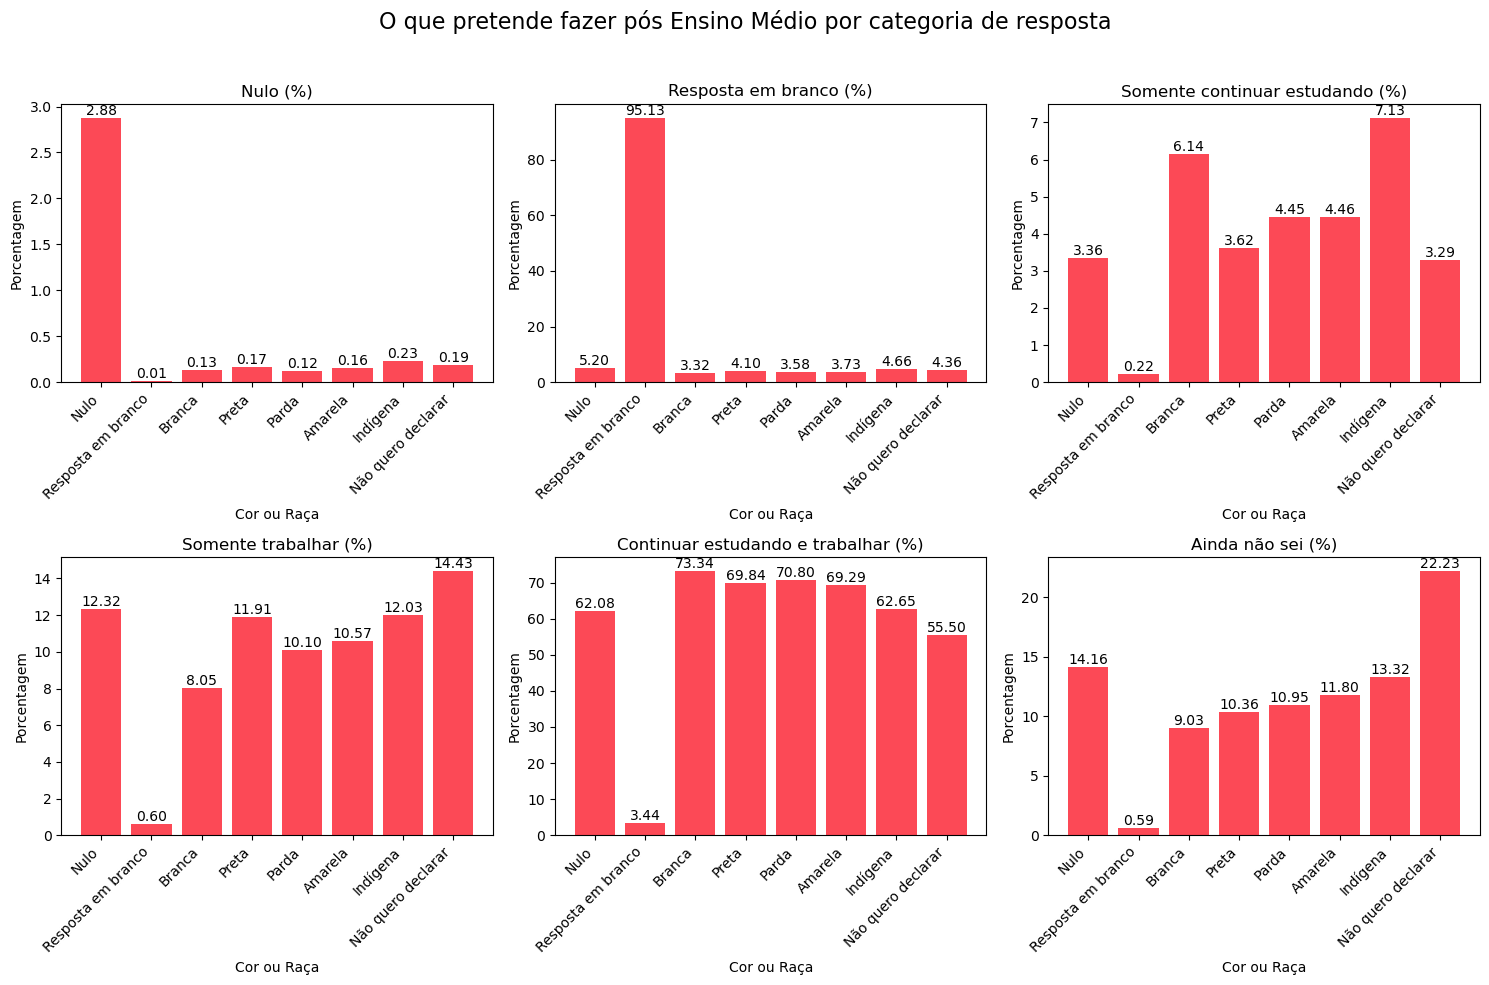

In [59]:
# Criação de subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('O que pretende fazer pós Ensino Médio por categoria de resposta', fontsize=16)

# Iteração sobre cada coluna
for i, coluna in enumerate(saeb2021_3EM_pos_Ensino_Medio_porcentagem.columns):
    # Seleciona o subplot correspondente
    ax = axs[i // 3, i % 3]
    
    # Cor para as barras)
    color = (0.99, # redness
         0.104, # greenness
         0.173, # blueness
         0.8 # transparency
         ) 
    
    # Criação do gráfico de barras
    barras = ax.bar(saeb2021_3EM_pos_Ensino_Medio_porcentagem.index, saeb2021_3EM_pos_Ensino_Medio_porcentagem[coluna], color=color)
    
    # Adiciona rótulos no topo de cada barra
    for barra in barras:
        altura = barra.get_height()
        ax.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:.2f}', ha='center', va='bottom')
    
    # Adiciona rótulos e título
    ax.set_title(coluna)
    ax.set_xlabel('Cor ou Raça')
    ax.set_ylabel('Porcentagem')

    # Ajusta os rótulos do eixo X
    ax.set_xticks(saeb2021_3EM_pos_Ensino_Medio_porcentagem.index)
    ax.set_xticklabels(saeb2021_3EM_pos_Ensino_Medio_porcentagem.index, rotation=45, ha='right')
    
# Ajusta o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Salvar imagem:
plt.savefig('3EM_Pos EM_2.png')

# Exibe o gráfico
plt.show()